# About

Sentiment analysis pada dataset twitter Ganjar Pranowo menggunakan TF-IDF, Naive Bayes, dan Support Vector Machine

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import numpy as np
import pandas as pd

# Dataset

In [111]:
dataset_gp = r'/content/drive/MyDrive/Freelance/[Data] Sentiment Analysis AB-GP_TF-IDF, NB, SVM/Final Project/dataset/Ganjar_Labeling_3000.csv'

In [112]:
data_ganjar = pd.read_csv(dataset_gp, delimiter=';')
data_ganjar

,tweet,label
0,gunromli ganjarpranowo ganjariancom terus bokep,0
1,mediaindonesia jokowi mohmahfudmd psi id detik...,0
2,ch chotimah ganjarpranowo hahahahaha cennuull ...,0
3,atipsthahir ganjarpranowo sadis bang wkwkw lol,0
4,rudyfarthuack ndaxwz ganjarpranowo dennysirega...,0
...,...,...
2995,mykonemt summerhabit dpubmckjateng ganjarprano...,2
2996,tukangrosok ganjarpranowo pecat and pidana tol...,2
2997,turut bebarapa hasil survei posisi ganjar pran...,2
2998,bangsaygsujud kangrongsok kaesangp prabowo jok...,2


In [113]:
data_ganjar.isnull().sum()

tweet    0
label    0
dtype: int64

In [114]:
df_ganjar = data_ganjar.copy()

mapping label yang berbentuk angka menjadi bentuk klasifikasi (positif, negatif, neutral)

In [115]:
df_ganjar["observasi"] = df_ganjar["label"].map({0: "negatif", 1: "positif", 2: "neutral"})
df_ganjar.head()

,tweet,label,observasi
0,gunromli ganjarpranowo ganjariancom terus bokep,0,negatif
1,mediaindonesia jokowi mohmahfudmd psi id detik...,0,negatif
2,ch chotimah ganjarpranowo hahahahaha cennuull ...,0,negatif
3,atipsthahir ganjarpranowo sadis bang wkwkw lol,0,negatif
4,rudyfarthuack ndaxwz ganjarpranowo dennysirega...,0,negatif


In [116]:
# Cek sample dari data
sample_ganjar = df_ganjar.groupby('label').apply(lambda x: x.sample(5))
sample_ganjar

tweet  label observasi
label                                                                         
0     6     brewok gondrong pendulumsosial simbok dharmi y...      0   negatif
      39    dhemit is back ganjarpranowo monggo ganjarpran...      0   negatif
      518     ganjarpranowo esdmjateng macet juwana piye njer      0   negatif
      567   komentar negatif kerja anies kenal ganjar pran...      0   negatif
      655          ganjarpranowo luwih becik ngene stop bokep      0   negatif
1     1150  ganjar ajak anak muda hobi bangsa yamin suprat...      1   positif
      2224             ganjar app ganjarpranowo ulama teladan      1   positif
      2125              masyarakat pilih ganjar pranowo hidup      1   positif
      733   dukung ganjar pranowo pimpin rindu rakyat ganj...      1   positif
      2102  ganjar app ganjarpranowo pimpin hebat miskin k...      1   positif
2     2986  geloraco ganjarpranowo janji jin tolong warga ...      2   neutral
      2815  jelli cent ganjarpranowo jokowi ganjar preside...      2   neutral
      2653  irwan divhumas polri ganjarpranowo yangg beefb...      2   neutral
      2798  luv resihati pdi juang kemenpora ri ganjarpran...      2   neutral
      2905  sahabat jalancantik jatenggayeng npekerjaan be...      2   neutral

In [117]:
df_ganjar["observasi"].value_counts()

positif    1765
negatif     732
neutral     503
Name: observasi, dtype: int64

Hitung proporsi distribusi untuk menentukan metode OVR atau OVO dalam model Naive Bayes

In [118]:
# Tentukan distribusi masing-masing hasil labeling
class_distribution = pd.DataFrame({'sentimen': ['positif', 'negatif', 'neutral'],
                                   'value_counts': [1398, 1119, 483]})

# Hitung proporsi distribusi
class_distribution['proporsi'] = (class_distribution['value_counts'] / class_distribution['value_counts'].sum()) * 100
print(class_distribution)

  sentimen  value_counts  proporsi
0  positif          1398      46.6
1  negatif          1119      37.3
2  neutral           483      16.1


# TF IDF dan Naive Bayes

In [119]:
def feature_extraction(data, method="tfidf"):
    from sklearn.feature_extraction.text import TfidfVectorizer

    feature_extraction = TfidfVectorizer(sublinear_tf=True)
    features = feature_extraction.fit_transform(data)

    return features

def nb_classifier(features, label, classifier="naive_bayes"):
    from sklearn.metrics import roc_auc_score
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.preprocessing import label_binarize

    model = MultinomialNB()
    model.fit(features, label)
    probability_to_be_positive = model.predict_proba(features)
    predict_output = model.predict(features)

    # Konversi label multi-class ke format one-hot-encoding
    binarized_label = label_binarize(label, classes=np.unique(label))

    # Gunakan  multi_class='ovo' karena proporsi distribusi tidak seimbang
    print("auc (train data):" , roc_auc_score(
        binarized_label,
        probability_to_be_positive,
        multi_class='ovo'))

    print("top 10 scores:")
    for i in range(10):
        if predict_output[i] == 0:
            label = 'negatif'
        elif predict_output[i] == 1:
            label = 'positif'
        elif predict_output[i] == 2:
            label = 'neutral'
        print(f"{probability_to_be_positive[i]} = {predict_output[i]} ({label})")

    return model

In [120]:
data = np.array(df_ganjar["tweet"])
label = np.array(df_ganjar["label"])

Lakukan pembobotan untuk masing-masing kata pada tweet.

In [121]:
features = feature_extraction(data, method="tfidf")
print(features)

  (0, 819)	0.4551560067915406
  (0, 6527)	0.5025206316434383
  (0, 1852)	0.5335819635677821
  (0, 1868)	0.10095079143030396
  (0, 2083)	0.49538394212873355
  (1, 507)	0.24281170891926807
  (1, 7010)	0.301102822072406
  (1, 6825)	0.19848863711413817
  (1, 4819)	0.23062525483722554
  (1, 3166)	0.26791632489832823
  (1, 3319)	0.301102822072406
  (1, 2722)	0.15342132737628963
  (1, 4914)	0.15662858132789947
  (1, 76)	0.19743875766314775
  (1, 4737)	0.15162501023620673
  (1, 2132)	0.301102822072406
  (1, 3141)	0.2864175631296507
  (1, 1302)	0.2613129471505906
  (1, 2341)	0.1917081523876853
  (1, 5279)	0.2195648491195811
  (1, 3902)	0.2257889741352256
  (1, 2704)	0.1260848983691797
  (1, 3723)	0.301102822072406
  (1, 1868)	0.04271803994793752
  (2, 2371)	0.25896434786945427
  :	:
  (2997, 5053)	0.2027937185231563
  (2997, 1836)	0.08973263505569581
  (2997, 5189)	0.17762726262064002
  (2998, 538)	0.3236325174712236
  (2998, 2831)	0.31185934716963687
  (2998, 3730)	0.3236325174712236
  (2998, 

Lakukan training menggunakan model Naive Bayes.

In [122]:
nb_train = nb_classifier(features, label, "naive_bayes")
print(nb_train)

auc (train data): 0.9771800322261903
top 10 scores:
[0.7516096  0.20494996 0.04344044] = 0 (negatif)
[0.55435877 0.34860793 0.0970333 ] = 0 (negatif)
[0.83813512 0.07979125 0.08207363] = 0 (negatif)
[0.50745478 0.3409037  0.15164152] = 0 (negatif)
[0.64342004 0.29106296 0.06551701] = 0 (negatif)
[0.75574641 0.1859957  0.0582579 ] = 0 (negatif)
[0.68074311 0.17944731 0.13980958] = 0 (negatif)
[0.53247689 0.37416554 0.09335756] = 0 (negatif)
[0.83197205 0.09317702 0.07485093] = 0 (negatif)
[0.51862823 0.34258441 0.13878736] = 0 (negatif)
MultinomialNB()


In [123]:
import pandas as pd
import numpy as np
import pickle

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

Lakukan pemrosesan TF-IDF dengan data tweet sebagai variabel X dan data label sebagai variabel y.

In [124]:
X = df_ganjar['tweet']
y = df_ganjar['label']

bow_transformer = CountVectorizer().fit(df_ganjar['tweet'])
messages_bow = bow_transformer.transform(df_ganjar['tweet'])
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

Lakukan kembali proses train dan split dengan rasio yang sama yaitu data train sebesar 80% dan data test sebesar 20%.

In [125]:
X_train,X_test,y_train,y_test = train_test_split(df_ganjar['tweet'],df_ganjar['label'],test_size=0.2,random_state=42)

pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

X_train = np.asarray(X)
pipeline = pipeline.fit(X_train, np.asarray(y))

Buat data pickle setelah proses training selesai dilakukan. Pickle akan digunakan untuk menjalankan proses deep learning.

In [126]:
pickle_name = 'df_ganjar.pickle'
pickle_path = '/content/drive/MyDrive/Freelance/[Data] Sentiment Analysis AB-GP_TF-IDF, NB, SVM/Final Project/pickle/'

In [127]:
with open(pickle_path+pickle_name, 'wb') as f:
    pickle.dump(pipeline, f)

Ganti parameter open untuk membaca atau menggunakan pickle.

In [128]:
with open(pickle_path+pickle_name, 'rb') as f:
    pickle_ganjar = pickle.load(f)
    print(pickle_ganjar)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])


Lakukan prediksi dengan dataset lain

In [129]:
path_test = r'/content/drive/MyDrive/Freelance/[Data] Sentiment Analysis AB-GP_TF-IDF, NB, SVM/Final Project/dataset/Evaluasi/Ganjar_Testing_Model.csv'

In [130]:
df_test = pd.read_csv(path_test, delimiter=',')
df_test.head()

,Datetime,Username,Text,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming
0,2023-05-30 21:29:31+00:00,YeyenAgoestine,b'@dada_gada @loyalisgaruda @aniesbaswedan @ga...,dada_gada loyalisgaruda aniesbaswedan ganjarp...,dada_gada loyalisgaruda aniesbaswedan ganjarp...,"['dada_gada', 'loyalisgaruda', 'aniesbaswedan'...","['dada_gada', 'loyalisgaruda', 'aniesbaswedan'...","['dada_gada', 'loyalisgaruda', 'aniesbaswedan'...",dada gada loyalisgaruda aniesbaswedan ganjarpr...
1,2023-04-16 23:58:50+00:00,FaozanAmar,b'Terima kasih\xf0\x9f\x99\x8f https://t.co/c...,Terima kasih ganjarpranowo HaedarNs Abe_Mukti...,terima kasih ganjarpranowo haedarns abe_mukti...,"['terima', 'kasih', 'ganjarpranowo', 'haedarns...","['terima', 'kasih', 'ganjarpranowo', 'haedarns...","['terima', 'kasih', 'ganjarpranowo', 'haedarns...",terima kasih ganjarpranowo haedarns abe mukti ...
2,2023-01-30 23:53:19+00:00,WendraJumaisar1,"b'@ganjarpranowo Kunci hidup bahagia n damai, ...",ganjarpranowo Kunci hidup bahagia damai jgn p...,ganjarpranowo kunci hidup bahagia damai jgn p...,"['ganjarpranowo', 'kunci', 'hidup', 'bahagia',...","['ganjarpranowo', 'kunci', 'hidup', 'bahagia',...","['ganjarpranowo', 'kunci', 'hidup', 'bahagia',...",ganjarpranowo kunci hidup bahagia damai pilih ...
3,2023-05-31 07:31:17+00:00,FirzaHusainID,"b'Pa Ganjar Pranowo bukan pengusaha, tidak pul...",Ganjar Pranowo bukan pengusaha tidak pula kay...,ganjar pranowo bukan pengusaha tidak pula kay...,"['ganjar', 'pranowo', 'bukan', 'pengusaha', 't...","['ganjar', 'pranowo', 'bukan', 'pengusaha', 't...","['ganjar', 'pranowo', 'pengusaha', 'kayak', 'r...",ganjar pranowo usaha kayak raya beliau gila ha...
4,2023-05-31 08:06:02+00:00,Fentika_95,b'@HoliGan_ID @ganjarpranowo Ini tempahan oran...,HoliGan_ID ganjarpranowo Ini tempahan orang t...,holigan_id ganjarpranowo ini tempahan orang t...,"['holigan_id', 'ganjarpranowo', 'ini', 'tempah...","['holigan_id', 'ganjarpranowo', 'ini', 'tempah...","['holigan_id', 'ganjarpranowo', 'tempahan', 'o...",holigan id ganjarpranowo tempah orang tua ganj...


Berdasarkan dataset, data yang diperlukan pada feature enineering ini hanyalah data terakhir yaitu setelah pemrosesan pada tahap pre-processing selesai dilakukan.

In [131]:
df_test = df_test[["stemming"]].rename(columns={"stemming": "tweet"})
df_test = df_test["tweet"]
df_test

0       dada gada loyalisgaruda aniesbaswedan ganjarpr...
1       terima kasih ganjarpranowo haedarns abe mukti ...
2       ganjarpranowo kunci hidup bahagia damai pilih ...
3       ganjar pranowo usaha kayak raya beliau gila ha...
4       holigan id ganjarpranowo tempah orang tua ganj...
                              ...                        
6221    wongayoe fenisiaphoenix dukung total ganjar pr...
6222    ganjarpranowo ndari jateng bangun indonesia nu...
6223    ejanghadian apokrifa suryadigatot ganjarpranow...
6224    alisyarief adek armando dukung ganjar ganjar p...
6225                    rismawidiono ganjarpranowo lanjut
Name: tweet, Length: 6226, dtype: object

In [132]:
null_values = df_test.isnull().sum()
print(f"Total null values: {null_values}")

Total null values: 0


In [133]:
duplikat = df_test.duplicated(keep=False).sum()
print("Total duplikat:", duplikat)

Total duplikat: 0


In [134]:
# Drop duplikat jika ada
df_test = df_test.drop_duplicates()

duplikat = df_test.duplicated(keep=False).sum()
print("Total duplikat:", duplikat)

Total duplikat: 0


Lakukan prediksi menggunakan pickle yang telah dibuat sebelumnya.

In [135]:
prediction = pickle_ganjar.predict(np.asarray(df_test))
prediction

array([0, 1, 1, ..., 1, 1, 1])

Simpan hasil prediksi ke dalam dataset dengan cara melakukan looping sesuai hasil prediksi. Parameter yang digunakan masih sama seperti sebelumnya, yaitu:

- Prediksi 0: Negatif
- Prediksi 1: Positif
- Prediksi 2: Neutral

In [136]:
result = []

for i in range(len(prediction)):
    if(prediction[i] == 0):
        sentiment = 'negatif'
    elif(prediction[i] == 1):
        sentiment = 'positif'
    elif(prediction[i] == 2):
        sentiment = 'neutral'

    result.append({'tweet':df_test.iloc[i],'label':prediction[i],'prediksi':sentiment})

data = pd.DataFrame(result)
data

,tweet,label,prediksi
0,dada gada loyalisgaruda aniesbaswedan ganjarpr...,0,negatif
1,terima kasih ganjarpranowo haedarns abe mukti ...,1,positif
2,ganjarpranowo kunci hidup bahagia damai pilih ...,1,positif
3,ganjar pranowo usaha kayak raya beliau gila ha...,1,positif
4,holigan id ganjarpranowo tempah orang tua ganj...,1,positif
...,...,...,...
6221,wongayoe fenisiaphoenix dukung total ganjar pr...,1,positif
6222,ganjarpranowo ndari jateng bangun indonesia nu...,1,positif
6223,ejanghadian apokrifa suryadigatot ganjarpranow...,1,positif
6224,alisyarief adek armando dukung ganjar ganjar p...,1,positif


In [137]:
sample_prediksi = data.groupby('prediksi').apply(lambda x: x.sample(5))
sample_prediksi

tweet  label  \
prediksi                                                                  
negatif  138   duniafana syafrialdasri ch chotimah ganjarpran...      0   
         3045           ganjarpranowo islam ktp lihat film porno      0   
         1190  ch chotimah ganjarpranowo but khusus dana buat...      0   
         3459  khojan x x pati sakao abu waras ganjarpranowo ...      0   
         5293  studsguy surabioncomamis sigiwarmada abdulrach...      0   
neutral  298   hasim azm ganjarpranowo laporgub pdkjateng ana...      2   
         4812  lembayung prabowo ikn id jokowi ganjarpranowo ...      2   
         1138  restu ibnuusm hasim azm ganjarpranowo laporgub...      2   
         954   dobelden anakdesaid disdukcapil pml laporgub g...      2   
         2127  wongayoe ganjarpranowo billray otnayram me ret...      2   
positif  3412  survei lsi denny prabowo urut persen ikut anie...      1   
         3004  ratus doorprize puluh stand umkm warna festiva...      1   
         4836      ganjar app ganjarpranowo mantap ganjar lanjut      1   
         1331                   sintaa santii ganjarpranowo tuju      1   
         300      xiaoyi candra smara ganjarpranowo hidup bokeep      1   

              prediksi  
prediksi                
negatif  138   negatif  
         3045  negatif  
         1190  negatif  
         3459  negatif  
         5293  negatif  
neutral  298   neutral  
         4812  neutral  
         1138  neutral  
         954   neutral  
         2127  neutral  
positif  3412  positif  
         3004  positif  
         4836  positif  
         1331  positif  
         300   positif

Lakukan pengecekan tiap data pada masing-masing prediksi, kemudian buat wordcloudnya

In [138]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Lakukan pengecekan pada data positif.

In [139]:
positif = data.loc[data['prediksi']=='positif', 'tweet']
positif

1       terima kasih ganjarpranowo haedarns abe mukti ...
2       ganjarpranowo kunci hidup bahagia damai pilih ...
3       ganjar pranowo usaha kayak raya beliau gila ha...
4       holigan id ganjarpranowo tempah orang tua ganj...
5       ganjar pranowo baik kualitas didik jateng ganj...
                              ...                        
6221    wongayoe fenisiaphoenix dukung total ganjar pr...
6222    ganjarpranowo ndari jateng bangun indonesia nu...
6223    ejanghadian apokrifa suryadigatot ganjarpranow...
6224    alisyarief adek armando dukung ganjar ganjar p...
6225                    rismawidiono ganjarpranowo lanjut
Name: tweet, Length: 5120, dtype: object

Lakukan looping untuk melihat setiap tweet dengan sentimen positif

In [140]:
for pos in positif[:10]:
    print(pos)

terima kasih ganjarpranowo haedarns abe mukti muhammadiyah
ganjarpranowo kunci hidup bahagia damai pilih usung banteng
ganjar pranowo usaha kayak raya beliau gila harta beliau terima gaji gaji sumbang baznas npa ganjar teladan ganjarmenangtotal
holigan id ganjarpranowo tempah orang tua ganjar pranowo
ganjar pranowo baik kualitas didik jateng ganjarjaminkemajuanri
gubernur ganjarpranowo pesan warga kelompok tani terima sertifikat tanah surat putus hutan sosial tanah objek reforma agraria tora sahabatganjar
dhemit is back ganjarpranowo ganjarpranowo guna kades camat bupati tolong cerdas dikit
ganjar app ganjarpranowo perempuan sekolah milik didik
ganjaranapp ganjarpranowo inflasi ganjar gercep banget tangan
orang politis tolol nyali campur adu agama politik olahraga bigot ganjarpranowo puanmaharani ri pdi juang nyali tarung wujud visi jokowi percaya narasi tolol tutup agenda popularisme


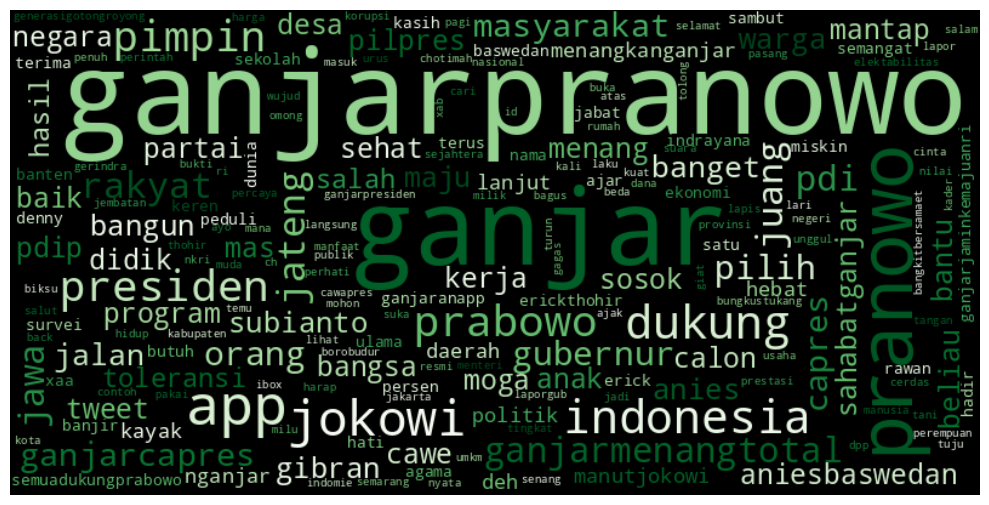

In [141]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize ulang kolom "NoStopwordsTweets" agar kalimat dikonversi menjadi kata-kata.
re_tokenize = [nltk.word_tokenize(tweet) for tweet in positif]

# Flatten: Konversi list kata-kata ke dalam satu list
list_kata = nltk.FreqDist([kata for tweet in re_tokenize for kata in tweet])

# Wordcloud
wordcloud = WordCloud(width=800, height=400, colormap='Greens').generate_from_frequencies(list_kata)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [142]:
top_10_positif = list_kata.most_common(10)

data_positif = {
    'Kata Positif': [kata for kata, total in top_10_positif],
    'Total': [total for kata, total in top_10_positif]
}

tabel_positif = pd.DataFrame(data_positif)
tabel_positif

,Kata Positif,Total
0,ganjarpranowo,4175
1,ganjar,3379
2,pranowo,1449
3,app,751
4,jokowi,552
5,indonesia,474
6,dukung,472
7,prabowo,424
8,presiden,423
9,pimpin,405


Lakukan pengecekan pada data negatif.

In [143]:
negatif = data.loc[data['prediksi']=='negatif', 'tweet']
negatif

0       dada gada loyalisgaruda aniesbaswedan ganjarpr...
13                sarah enjeull ganjarpranowo citra kerja
14      yusuf dumdum ganjeng ganjarpranowo capek mutar...
15      aryprasetyo aniesbaswedan kpk ri kejaksaanri n...
16      ch chotimah ganjarpranowo inti pakai ayat maya...
                              ...                        
6189    ch chotimah ganjarpranowo cebongwati komen kha...
6190    idrap ganjarpranowo masak enggak punya makan h...
6197    arielsyahril sukardi ganjarpranowo tanya sunga...
6206    youtubeilc aniesbaswedan agusyudhoyono ganjarp...
6216    ch chotimah ganjarpranowo buzzer basi malu jua...
Name: tweet, Length: 886, dtype: object

Lakukan looping untuk melihat setiap tweet dengan sentimen negatif

In [144]:
for neg in negatif[:10]:
    print(neg)

dada gada loyalisgaruda aniesbaswedan ganjarpranowo aib bahluul naib umbar nkan tulul nama nlo presiden kayak
sarah enjeull ganjarpranowo citra kerja
yusuf dumdum ganjeng ganjarpranowo capek mutarin provinsi nklo otak minimal malu
aryprasetyo aniesbaswedan kpk ri kejaksaanri nakula ds yantie firzahusainid erickthohir ganjarpranowo gibran tweet listyosigitp miicies wapemla miris lembaga superbody
ch chotimah ganjarpranowo inti pakai ayat mayat demo jilid gilir periksa kabur
ndaxwz ganjarpranowo beda politik olah raga duh
ch chotimah aniesbaswedan ganjarpranowo ganjar dukung partai nul
ganjarpranowo skedul mana minggu denmas gbk jakarta lagi tunda den coba cek den daerah aden prioritas jokowi
salmaverina nakula ganjarpranowo jalan trotoar drun natau sepeda jakarta kerja proyek ambil untung drun nsabar drun coba gila jadi waras susah drun
ch chotimah ganjarpranowo heickuntulbernanah jilatyrtus unanbokeniatkaiunantidiundang nobsrbokepolehsiubsn ckuntul ckuntul


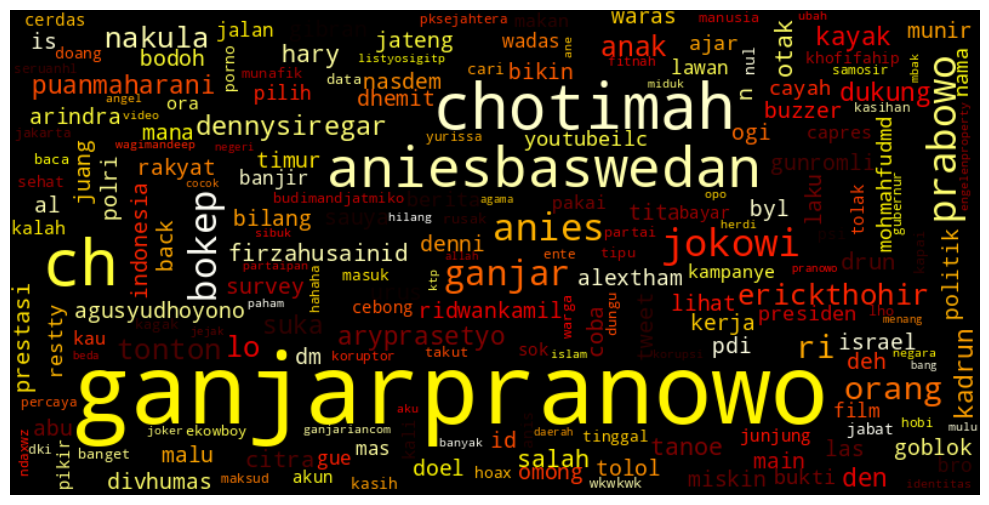

In [145]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize ulang kolom "NoStopwordsTweets" agar kalimat dikonversi menjadi kata-kata.
re_tokenize = [nltk.word_tokenize(tweet) for tweet in negatif]

# Flatten: Konversi list kata-kata ke dalam satu list
list_kata = nltk.FreqDist([kata for tweet in re_tokenize for kata in tweet])

# Wordcloud
wordcloud = WordCloud(width=800, height=400, colormap='hot').generate_from_frequencies(list_kata)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [146]:
top_10_negatif = list_kata.most_common(10)

data_negatif = {
    'Kata Negatif': [kata for kata, total in top_10_negatif],
    'Total': [total for kata, total in top_10_negatif]
}

tabel_negatif = pd.DataFrame(data_negatif)
tabel_negatif

,Kata Negatif,Total
0,ganjarpranowo,899
1,chotimah,274
2,ch,273
3,aniesbaswedan,206
4,prabowo,93
5,jokowi,88
6,anies,80
7,bokep,78
8,ganjar,66
9,orang,58


Lakukan pengecekan pada data neutral.

In [147]:
neutral = data.loc[data['prediksi']=='neutral', 'tweet']
neutral

32      halo sahabatjalancantik kerja pelihara rutin j...
101     hai sahabat jalancantik npekerjaan ctb jalan a...
111     dpusdatarujtg provjateng ganjarpranowo tajyasi...
139     nuhargamati ganjarpranowo provjateng bptjwilsk...
147     halo sahabatjalancantik npekerjaan rumija tang...
                              ...                        
6075    fenisiaphoenix ganjarpranowo dew snu cryptokut...
6089    satpol kab cilacap giat wilayah kabupaten cila...
6120    syaif ganjarpranowo monggo puprjalanjtgdiy rua...
6192    ganjarpranowo laporgub pakai study tour niku n...
6210    studi komparasi bus bbg ramah lingkung efisien...
Name: tweet, Length: 220, dtype: object

In [148]:
for net in neutral[:10]:
    print(net)

halo sahabatjalancantik kerja pelihara rutin jalan jembatan balai kelola jalan wilayah pati jatenglawancorona bersamalawancorona ganjarpranowo tajyasinmz provjateng dprdjatengprov humasjateng dpubmckjateng
hai sahabat jalancantik npekerjaan ctb jalan ambles nbalai kelola jalan wilayah surakarta nruas purwantoro nawangan jatenggayeng ayokerjamaneh ganjarpranowo tajyasinmz provjateng dprdjatengprov dpubmckjateng humasjateng
dpusdatarujtg provjateng ganjarpranowo tajyasinmz bpkadjtg gass kerja kerja kerja
nuhargamati ganjarpranowo provjateng bptjwilska ruas kabulpaten monggo dpukebumen gas gas
halo sahabatjalancantik npekerjaan rumija tanggal mei pelihara rutin jalan jembatan balai kelola jalan wilayah pati jatenglawancorona bersamalawancorona ganjarpranowo tajyasinmz provjateng dprdjatengprov humasjateng dpubmckjateng
studi komparasi perhubunganjtg perumppdid bus bbg ramah lingkung efisien erickthohir kemenhub budikaryas perhubunganjtg humasjateng ganjarpranowo perumppdid jac premium ppd

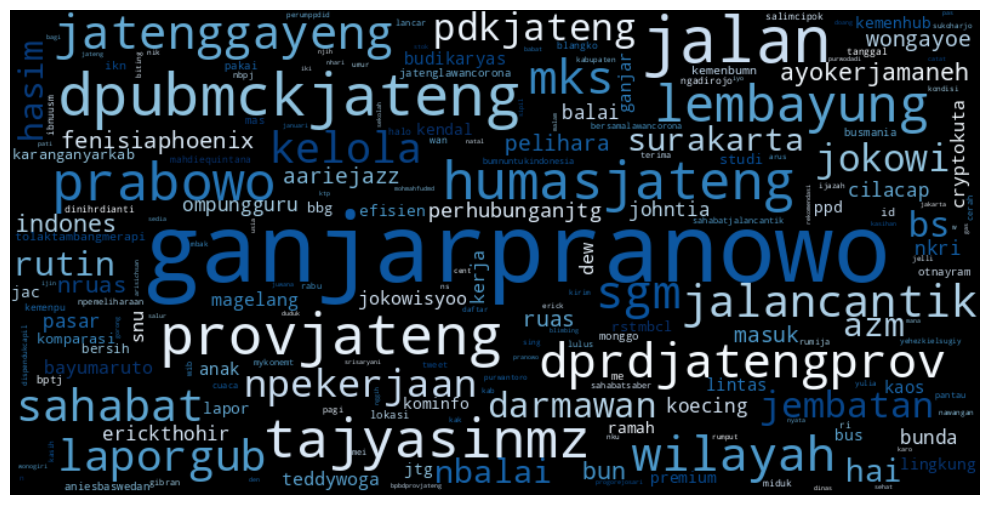

In [149]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize ulang kolom "NoStopwordsTweets" agar kalimat dikonversi menjadi kata-kata.
re_tokenize = [nltk.word_tokenize(tweet) for tweet in neutral]

# Flatten: Konversi list kata-kata ke dalam satu list
list_kata = nltk.FreqDist([kata for tweet in re_tokenize for kata in tweet])

# Wordcloud
wordcloud = WordCloud(width=800, height=400, colormap='Blues_r').generate_from_frequencies(list_kata)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [150]:
top_10_neutral = list_kata.most_common(10)

data_neutral = {
    'Kata Neutral': [kata for kata, total in top_10_neutral],
    'Total': [total for kata, total in top_10_neutral]
}

tabel_neutral = pd.DataFrame(data_neutral)
tabel_neutral

,Kata Neutral,Total
0,ganjarpranowo,222
1,jalan,69
2,dpubmckjateng,62
3,provjateng,56
4,tajyasinmz,52
5,prabowo,49
6,humasjateng,48
7,lembayung,44
8,dprdjatengprov,41
9,wilayah,40


Lanjutkan dengan melihat banyaknya sentiment positif, negatif, dan netral dari hasil prediksi.

In [151]:
data.groupby(by='prediksi').agg('count')

,tweet,label
prediksi,,
negatif,886,886
neutral,220,220
positif,5120,5120


In [152]:
data.groupby(by='prediksi')['tweet'].agg('count')

prediksi
negatif     886
neutral     220
positif    5120
Name: tweet, dtype: int64

Tampilkan dalam bentuk grafik untuk memudahkan dalam melihat klasifikasi sentimen.

In [153]:
list_prediksi = data.groupby(by='prediksi').agg('count').values.tolist()
print(list_prediksi)

[[886, 886], [220, 220], [5120, 5120]]


In [154]:
n_negatif = list_prediksi[0][0]
n_neutral = list_prediksi[1][0]
n_positif = list_prediksi[2][0]

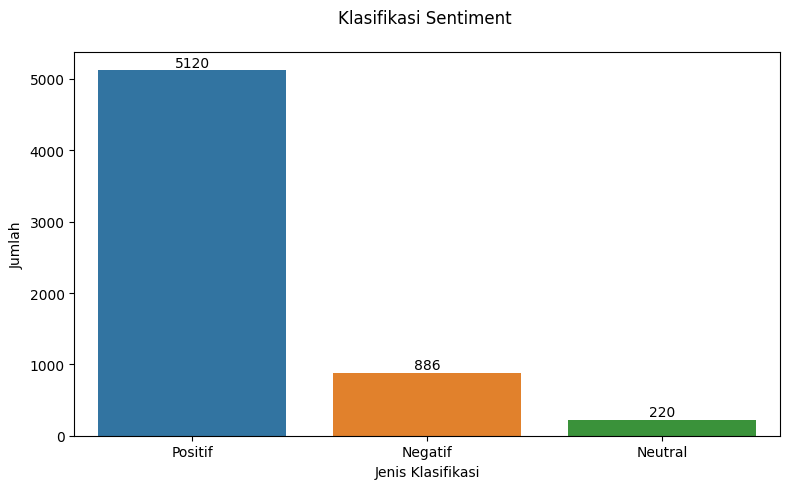

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True

x = ['Positif', 'Negatif', 'Neutral']
y = [n_positif, n_negatif, n_neutral]
percentage = [n_positif, n_negatif, n_neutral]

ax = sns.barplot(x=x, y=y)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+50
    ax.annotate('{:}'.format(percentage[i]), (x, y), ha='center')

plt.title('Klasifikasi Sentiment \n')
plt.xlabel('Jenis Klasifikasi')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan grafik, didapatkan data sebagai berikut.

1. Sentiment positif merupakan sentiment terbanyak dengan total 6263 sentiment.
2. Sentiment negatif merupakan sentiment dengan total 4415 sentiment.
3. Sentiment neutral merupakan sentiment tersedikit dengan total 729 sentiment.


## Evaluasi

Cek confussion matrix, classification report, dan cross val score.

In [156]:
data2 = data.copy()
data2.head(5)

,tweet,label,prediksi
0,dada gada loyalisgaruda aniesbaswedan ganjarpr...,0,negatif
1,terima kasih ganjarpranowo haedarns abe mukti ...,1,positif
2,ganjarpranowo kunci hidup bahagia damai pilih ...,1,positif
3,ganjar pranowo usaha kayak raya beliau gila ha...,1,positif
4,holigan id ganjarpranowo tempah orang tua ganj...,1,positif


Tentukan variabel X dan y terlebih dahulu agar dapat digunakan pada pemodelan.

In [157]:
# Menentukan x berdasarkan label
data_tweet = pd.DataFrame(data2,columns=['tweet'])
X = data_tweet['tweet']
X

0       dada gada loyalisgaruda aniesbaswedan ganjarpr...
1       terima kasih ganjarpranowo haedarns abe mukti ...
2       ganjarpranowo kunci hidup bahagia damai pilih ...
3       ganjar pranowo usaha kayak raya beliau gila ha...
4       holigan id ganjarpranowo tempah orang tua ganj...
                              ...                        
6221    wongayoe fenisiaphoenix dukung total ganjar pr...
6222    ganjarpranowo ndari jateng bangun indonesia nu...
6223    ejanghadian apokrifa suryadigatot ganjarpranow...
6224    alisyarief adek armando dukung ganjar ganjar p...
6225                    rismawidiono ganjarpranowo lanjut
Name: tweet, Length: 6226, dtype: object

In [158]:
# Menentukan y berdasarkan label
data_label = pd.DataFrame(data2,columns=['label'])
y = data_label['label']
y

0       0
1       1
2       1
3       1
4       1
       ..
6221    1
6222    1
6223    1
6224    1
6225    1
Name: label, Length: 6226, dtype: int64

Lakukan pembagian antara data train dan data test dengan rasio 8:2 atau data train sebesar 80% dan data test sebesar 20%.

In [159]:
from sklearn.model_selection import train_test_split

# Split dataset untuk train dan test
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lakukan vektorisasi untuk TF-IDF.

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF train-test
vect = TfidfVectorizer(analyzer="word", min_df=0.0004, max_df=0.115, ngram_range=(1,3))
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

Lakukan perhitungan skor akurasi berdasarkan MultinomialNB.

In [161]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Melakukan perhitungan skor akurasi berdasarkan MultinomialNB
nbmodel = MultinomialNB(alpha=0.1)
nbmodel = nbmodel.fit(X_train_dtm,Y_train)
Y_pred = nbmodel.predict(X_test_dtm)
print(f"Akurasi: {accuracy_score(Y_test,Y_pred)*100:.2f}")

Akurasi: 91.65


Tentukan hasil dari confusion matrix

In [162]:
from sklearn.metrics import confusion_matrix

# Menentukan confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f"Confusion Matrix:\n\n{cm}")

Confusion Matrix:

[[141  50   0]
 [ 34 973   8]
 [  2  10  28]]


In [163]:
sentimen = ['Negatif', 'Positif', 'Neutral']
df_cm = pd.DataFrame(cm, index=sentimen, columns=sentimen)
df_cm

,Negatif,Positif,Neutral
Negatif,141,50,0
Positif,34,973,8
Neutral,2,10,28


Tentukan hasil laporan klasifikasi.

In [164]:
from sklearn.metrics import classification_report

# Menentukan laporan hasil klasifikasi
report = classification_report(Y_test, Y_pred)
print(f"Hasil Laporan Klasifikasi:\n\n{report}")

Hasil Laporan Klasifikasi:

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       191
           1       0.94      0.96      0.95      1015
           2       0.78      0.70      0.74        40

    accuracy                           0.92      1246
   macro avg       0.84      0.80      0.82      1246
weighted avg       0.91      0.92      0.92      1246



Tentukan nilai cross_val_score.

In [165]:
from sklearn.model_selection import cross_val_score

# Menentukan nilai cross_val_score
cvs = cross_val_score(estimator=nbmodel, X=X_train_dtm, y=Y_train, cv=10)

# Loop kemudian cetak hasil
print("Cross Val Score:")
for n, score in enumerate(cvs, start=1):
    print(f"Folds ke-{n}: {score*100:.2f}")

Cross Val Score:
Folds ke-1: 89.96
Folds ke-2: 91.57
Folds ke-3: 89.76
Folds ke-4: 89.16
Folds ke-5: 90.56
Folds ke-6: 91.16
Folds ke-7: 91.16
Folds ke-8: 90.36
Folds ke-9: 88.35
Folds ke-10: 92.97


In [166]:
cvs_list = cvs.tolist()

# +1 pada nilai n_max dan n_min karena index dimulai dari 0
max_cvs = max(cvs_list)
n_max = (cvs_list.index(max_cvs)) + 1

min_cvs = min(cvs_list)
n_min = (cvs_list.index(min_cvs)) + 1

print(f"Cross val score terbesar terletak pada fold ke-{n_max} dengan nilai {max_cvs*100:.2f}")
print(f"Cross val score terkecil terletak pada fold ke-{n_min} dengan nilai {min_cvs*100:.2f}")

Cross val score terbesar terletak pada fold ke-10 dengan nilai 92.97
Cross val score terkecil terletak pada fold ke-9 dengan nilai 88.35


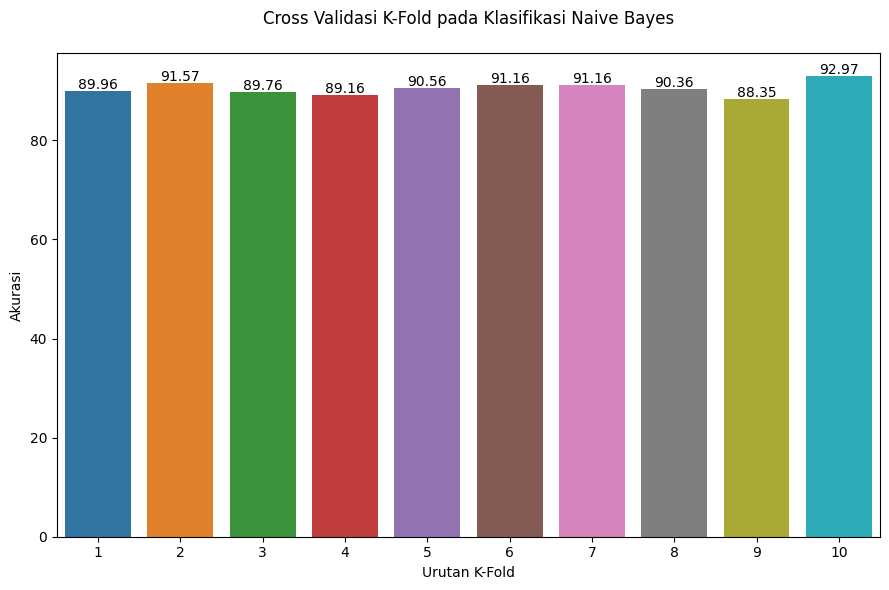

In [167]:
plt.rcParams["figure.figsize"] = [9,6]
plt.rcParams["figure.autolayout"] = True

# Tentukan x dan y pada plot
x = [1,2,3,4,5,6,7,8,9,10]
y = cvs*100

percentage = cvs*100
ax = sns.barplot(x=x, y=y)
patches = ax.patches

# Tambah keterangan di atas barplot
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.5
    ax.annotate('{:.2f}'.format(percentage[i]), (x, y), ha='center')

# Plot barplot
plt.title('Cross Validasi K-Fold pada Klasifikasi Naive Bayes\n')
plt.xlabel('Urutan K-Fold')
plt.ylabel('Akurasi')
plt.show()

# TF IDF dan Support Vector Machine

In [168]:
def feature_extraction(data, method="tfidf"):
    from sklearn.feature_extraction.text import TfidfVectorizer

    feature_extraction = TfidfVectorizer(sublinear_tf=True)
    features = feature_extraction.fit_transform(data)

    return features

def svm_classifier(features, label, classifier="svm"):
    from sklearn.metrics import roc_auc_score
    from sklearn.svm import SVC
    from sklearn.preprocessing import label_binarize

    model = SVC(probability=True)
    model.fit(features, label)
    probability_to_be_positive = model.predict_proba(features)
    predict_output = model.predict(features)

    # Konversi label multi-class ke format one-hot-encoding
    binarized_label = label_binarize(label, classes=np.unique(label))

    # Gunakan  multi_class='ovo' karena proporsi distribusi tidak seimbang
    print("auc (train data):" , roc_auc_score(
        binarized_label,
        probability_to_be_positive,
        multi_class='ovo'))

    print("top 10 scores:")
    for i in range(10):
        if predict_output[i] == 0:
            label = 'negatif'
        elif predict_output[i] == 1:
            label = 'positif'
        elif predict_output[i] == 2:
            label = 'neutral'
        print(f"{probability_to_be_positive[i]} = {predict_output[i]} ({label})")

    return model

In [169]:
data = np.array(df_ganjar["tweet"])
label = np.array(df_ganjar["label"])

Lakukan pembobotan untuk masing-masing kata pada tweet.

In [170]:
features = feature_extraction(data, method="tfidf")
print(features)

  (0, 819)	0.4551560067915406
  (0, 6527)	0.5025206316434383
  (0, 1852)	0.5335819635677821
  (0, 1868)	0.10095079143030396
  (0, 2083)	0.49538394212873355
  (1, 507)	0.24281170891926807
  (1, 7010)	0.301102822072406
  (1, 6825)	0.19848863711413817
  (1, 4819)	0.23062525483722554
  (1, 3166)	0.26791632489832823
  (1, 3319)	0.301102822072406
  (1, 2722)	0.15342132737628963
  (1, 4914)	0.15662858132789947
  (1, 76)	0.19743875766314775
  (1, 4737)	0.15162501023620673
  (1, 2132)	0.301102822072406
  (1, 3141)	0.2864175631296507
  (1, 1302)	0.2613129471505906
  (1, 2341)	0.1917081523876853
  (1, 5279)	0.2195648491195811
  (1, 3902)	0.2257889741352256
  (1, 2704)	0.1260848983691797
  (1, 3723)	0.301102822072406
  (1, 1868)	0.04271803994793752
  (2, 2371)	0.25896434786945427
  :	:
  (2997, 5053)	0.2027937185231563
  (2997, 1836)	0.08973263505569581
  (2997, 5189)	0.17762726262064002
  (2998, 538)	0.3236325174712236
  (2998, 2831)	0.31185934716963687
  (2998, 3730)	0.3236325174712236
  (2998, 

Lakukan training menggunakan model Naive Bayes.

In [171]:
svm_train = svm_classifier(features, label, "naive_bayes")
print(svm_train)

auc (train data): 0.998881809520789
top 10 scores:
[9.99184484e-01 1.07900282e-05 8.04726184e-04] = 0 (negatif)
[9.98182159e-01 1.15346361e-04 1.70249497e-03] = 0 (negatif)
[9.98051562e-01 6.96208754e-05 1.87881713e-03] = 0 (negatif)
[9.98062194e-01 4.81984515e-04 1.45582104e-03] = 0 (negatif)
[9.98248921e-01 8.56411706e-05 1.66543781e-03] = 0 (negatif)
[9.98450318e-01 8.08315913e-05 1.46885069e-03] = 0 (negatif)
[9.98326369e-01 9.05780037e-05 1.58305309e-03] = 0 (negatif)
[9.98316607e-01 1.11187361e-04 1.57220525e-03] = 0 (negatif)
[9.98014486e-01 4.88108975e-05 1.93670301e-03] = 0 (negatif)
[0.99403665 0.00454728 0.00141607] = 0 (negatif)
SVC(probability=True)


In [172]:
import pandas as pd
import numpy as np
import pickle

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

Lakukan pemrosesan TF-IDF dengan data tweet sebagai variabel X dan data label sebagai variabel y.

In [173]:
X = df_ganjar['tweet']
y = df_ganjar['label']

bow_transformer = CountVectorizer().fit(df_ganjar['tweet'])
messages_bow = bow_transformer.transform(df_ganjar['tweet'])
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

Lakukan kembali proses train dan split dengan rasio yang sama yaitu data train sebesar 80% dan data test sebesar 20%.

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
    ])

X_train = np.asarray(X)
pipeline = pipeline.fit(X_train, np.asarray(y))

Buat data pickle setelah proses training selesai dilakukan. Pickle akan digunakan untuk menjalankan proses deep learning.

In [175]:
pickle_name = 'df_ganjar_svm.pickle'
pickle_path = '/content/drive/MyDrive/Freelance/[Data] Sentiment Analysis AB-GP_TF-IDF, NB, SVM/Final Project/pickle/'

In [176]:
with open(pickle_path+pickle_name, 'wb') as f:
    pickle.dump(pipeline, f)

Ganti parameter open untuk membaca atau menggunakan pickle.

In [177]:
with open(pickle_path+pickle_name, 'rb') as f:
    pickle_ganjar_svm = pickle.load(f)
    print(pickle_ganjar_svm)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])


Lakukan prediksi dengan dataset lain

In [178]:
path_test = r'/content/drive/MyDrive/Freelance/[Data] Sentiment Analysis AB-GP_TF-IDF, NB, SVM/Final Project/dataset/Evaluasi/Ganjar_Testing_Model.csv'

In [179]:
df_test = pd.read_csv(path_test, delimiter=',')
df_test.head()

,Datetime,Username,Text,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming
0,2023-05-30 21:29:31+00:00,YeyenAgoestine,b'@dada_gada @loyalisgaruda @aniesbaswedan @ga...,dada_gada loyalisgaruda aniesbaswedan ganjarp...,dada_gada loyalisgaruda aniesbaswedan ganjarp...,"['dada_gada', 'loyalisgaruda', 'aniesbaswedan'...","['dada_gada', 'loyalisgaruda', 'aniesbaswedan'...","['dada_gada', 'loyalisgaruda', 'aniesbaswedan'...",dada gada loyalisgaruda aniesbaswedan ganjarpr...
1,2023-04-16 23:58:50+00:00,FaozanAmar,b'Terima kasih\xf0\x9f\x99\x8f https://t.co/c...,Terima kasih ganjarpranowo HaedarNs Abe_Mukti...,terima kasih ganjarpranowo haedarns abe_mukti...,"['terima', 'kasih', 'ganjarpranowo', 'haedarns...","['terima', 'kasih', 'ganjarpranowo', 'haedarns...","['terima', 'kasih', 'ganjarpranowo', 'haedarns...",terima kasih ganjarpranowo haedarns abe mukti ...
2,2023-01-30 23:53:19+00:00,WendraJumaisar1,"b'@ganjarpranowo Kunci hidup bahagia n damai, ...",ganjarpranowo Kunci hidup bahagia damai jgn p...,ganjarpranowo kunci hidup bahagia damai jgn p...,"['ganjarpranowo', 'kunci', 'hidup', 'bahagia',...","['ganjarpranowo', 'kunci', 'hidup', 'bahagia',...","['ganjarpranowo', 'kunci', 'hidup', 'bahagia',...",ganjarpranowo kunci hidup bahagia damai pilih ...
3,2023-05-31 07:31:17+00:00,FirzaHusainID,"b'Pa Ganjar Pranowo bukan pengusaha, tidak pul...",Ganjar Pranowo bukan pengusaha tidak pula kay...,ganjar pranowo bukan pengusaha tidak pula kay...,"['ganjar', 'pranowo', 'bukan', 'pengusaha', 't...","['ganjar', 'pranowo', 'bukan', 'pengusaha', 't...","['ganjar', 'pranowo', 'pengusaha', 'kayak', 'r...",ganjar pranowo usaha kayak raya beliau gila ha...
4,2023-05-31 08:06:02+00:00,Fentika_95,b'@HoliGan_ID @ganjarpranowo Ini tempahan oran...,HoliGan_ID ganjarpranowo Ini tempahan orang t...,holigan_id ganjarpranowo ini tempahan orang t...,"['holigan_id', 'ganjarpranowo', 'ini', 'tempah...","['holigan_id', 'ganjarpranowo', 'ini', 'tempah...","['holigan_id', 'ganjarpranowo', 'tempahan', 'o...",holigan id ganjarpranowo tempah orang tua ganj...


Berdasarkan dataset, data yang diperlukan pada feature enineering ini hanyalah data terakhir yaitu setelah pemrosesan pada tahap pre-processing selesai dilakukan.

In [180]:
df_test = df_test[["stemming"]].rename(columns={"stemming": "tweet"})
df_test = df_test["tweet"]
df_test

0       dada gada loyalisgaruda aniesbaswedan ganjarpr...
1       terima kasih ganjarpranowo haedarns abe mukti ...
2       ganjarpranowo kunci hidup bahagia damai pilih ...
3       ganjar pranowo usaha kayak raya beliau gila ha...
4       holigan id ganjarpranowo tempah orang tua ganj...
                              ...                        
6221    wongayoe fenisiaphoenix dukung total ganjar pr...
6222    ganjarpranowo ndari jateng bangun indonesia nu...
6223    ejanghadian apokrifa suryadigatot ganjarpranow...
6224    alisyarief adek armando dukung ganjar ganjar p...
6225                    rismawidiono ganjarpranowo lanjut
Name: tweet, Length: 6226, dtype: object

In [181]:
null_values = df_test.isnull().sum()
print(f"Total null values: {null_values}")

Total null values: 0


In [182]:
duplikat = df_test.duplicated(keep=False).sum()
print("Total duplikat:", duplikat)

Total duplikat: 0


In [183]:
# Drop duplikat jika ada
df_test = df_test.drop_duplicates()

duplikat = df_test.duplicated(keep=False).sum()
print("Total duplikat:", duplikat)

Total duplikat: 0


Lakukan prediksi menggunakan pickle yang telah dibuat sebelumnya.

In [184]:
prediction = pickle_ganjar_svm.predict(np.asarray(df_test))
prediction

array([0, 1, 1, ..., 0, 1, 1])

Simpan hasil prediksi ke dalam dataset dengan cara melakukan looping sesuai hasil prediksi. Parameter yang digunakan masih sama seperti sebelumnya, yaitu:

- Prediksi 0: Negatif
- Prediksi 1: Positif
- Prediksi 2: Neutral

In [185]:
result = []

for i in range(len(prediction)):
    if(prediction[i] == 0):
        sentiment = 'negatif'
    elif(prediction[i] == 1):
        sentiment = 'positif'
    elif(prediction[i] == 2):
        sentiment = 'neutral'

    result.append({'tweet':df_test.iloc[i],'label':prediction[i],'prediksi':sentiment})

data = pd.DataFrame(result)
data

,tweet,label,prediksi
0,dada gada loyalisgaruda aniesbaswedan ganjarpr...,0,negatif
1,terima kasih ganjarpranowo haedarns abe mukti ...,1,positif
2,ganjarpranowo kunci hidup bahagia damai pilih ...,1,positif
3,ganjar pranowo usaha kayak raya beliau gila ha...,1,positif
4,holigan id ganjarpranowo tempah orang tua ganj...,1,positif
...,...,...,...
6221,wongayoe fenisiaphoenix dukung total ganjar pr...,1,positif
6222,ganjarpranowo ndari jateng bangun indonesia nu...,1,positif
6223,ejanghadian apokrifa suryadigatot ganjarpranow...,0,negatif
6224,alisyarief adek armando dukung ganjar ganjar p...,1,positif


In [186]:
sample_prediksi = data.groupby('prediksi').apply(lambda x: x.sample(5))
sample_prediksi

tweet  label  \
prediksi                                                                  
negatif  4906  keren uban pakai pakean madura gayeng ganjarpr...      0   
         2878  data lapang saing urut prabowo urut ganjarpran...      0   
         2678  ganjarpranowo bicara manusia anies bangun kamp...      0   
         2463  yopiluthfi ganjarpranowo komen jelek orang tat...      0   
         4719  ngilmukantilaku nenkmonica fitnah coba ente bu...      0   
neutral  4816  mykonemt dpubmckjateng ganjarpranowo karangany...      2   
         5561  yusuf dumdum erickthohir ganjarpranowo anjing ...      2   
         3931  ganjarpranowo laporgub masok satsett ngono lo ...      2   
         550   pantau lintas natal lokasi kalibanteng tanggal...      2   
         161   hai sahabat jalancantik npekerjaan bersih salu...      2   
positif  2001      ganjar app ganjarpranowo perhati didik ganjar      1   
         3478                       ganjarpranowo oalaah periode      1   
         2386  ganjaranapp ganjarpranowo ungsi lengkap jamban...      1   
         5559  ganjarpranowo masyarakat cap negeri negara kon...      1   
         2935                         moment terus ganjarpranowo      1   

              prediksi  
prediksi                
negatif  4906  negatif  
         2878  negatif  
         2678  negatif  
         2463  negatif  
         4719  negatif  
neutral  4816  neutral  
         5561  neutral  
         3931  neutral  
         550   neutral  
         161   neutral  
positif  2001  positif  
         3478  positif  
         2386  positif  
         5559  positif  
         2935  positif

Lakukan pengecekan tiap data pada masing-masing prediksi, kemudian buat wordcloudnya

In [187]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Lakukan pengecekan pada data positif.

In [188]:
positif = data.loc[data['prediksi']=='positif', 'tweet']
positif

1       terima kasih ganjarpranowo haedarns abe mukti ...
2       ganjarpranowo kunci hidup bahagia damai pilih ...
3       ganjar pranowo usaha kayak raya beliau gila ha...
4       holigan id ganjarpranowo tempah orang tua ganj...
5       ganjar pranowo baik kualitas didik jateng ganj...
                              ...                        
6220                        ganjarpranowo lejingnya bagus
6221    wongayoe fenisiaphoenix dukung total ganjar pr...
6222    ganjarpranowo ndari jateng bangun indonesia nu...
6224    alisyarief adek armando dukung ganjar ganjar p...
6225                    rismawidiono ganjarpranowo lanjut
Name: tweet, Length: 4302, dtype: object

Lakukan looping untuk melihat setiap tweet dengan sentimen positif

In [189]:
for pos in positif[:10]:
    print(pos)

terima kasih ganjarpranowo haedarns abe mukti muhammadiyah
ganjarpranowo kunci hidup bahagia damai pilih usung banteng
ganjar pranowo usaha kayak raya beliau gila harta beliau terima gaji gaji sumbang baznas npa ganjar teladan ganjarmenangtotal
holigan id ganjarpranowo tempah orang tua ganjar pranowo
ganjar pranowo baik kualitas didik jateng ganjarjaminkemajuanri
gubernur ganjarpranowo pesan warga kelompok tani terima sertifikat tanah surat putus hutan sosial tanah objek reforma agraria tora sahabatganjar
ganjar app ganjarpranowo perempuan sekolah milik didik
ganjaranapp ganjarpranowo inflasi ganjar gercep banget tangan
mata ganjar pranowo santridukungganjar santriuntuknegeri santrinusantara ganjar ganjar ganjarpranowo ganjarpresiden ganjarforpresident
paseban samgoundez ganjarpranowo laporgub semarang mas tengellam woyy


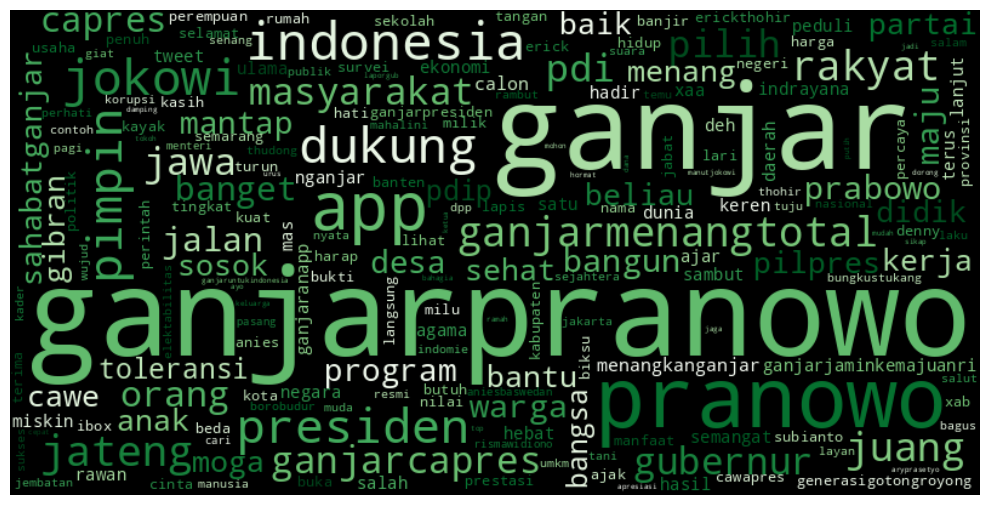

In [190]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize ulang kolom "NoStopwordsTweets" agar kalimat dikonversi menjadi kata-kata.
re_tokenize = [nltk.word_tokenize(tweet) for tweet in positif]

# Flatten: Konversi list kata-kata ke dalam satu list
list_kata = nltk.FreqDist([kata for tweet in re_tokenize for kata in tweet])

# Wordcloud
wordcloud = WordCloud(width=800, height=400, colormap='Greens').generate_from_frequencies(list_kata)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [191]:
top_10_positif = list_kata.most_common(10)

data_positif = {
    'Kata Positif': [kata for kata, total in top_10_positif],
    'Total': [total for kata, total in top_10_positif]
}

tabel_positif = pd.DataFrame(data_positif)
tabel_positif

,Kata Positif,Total
0,ganjarpranowo,3434
1,ganjar,3220
2,pranowo,1351
3,app,751
4,indonesia,440
5,jokowi,408
6,dukung,403
7,pimpin,392
8,presiden,386
9,jateng,291


Lakukan pengecekan pada data negatif.

In [192]:
negatif = data.loc[data['prediksi']=='negatif', 'tweet']
negatif

0       dada gada loyalisgaruda aniesbaswedan ganjarpr...
7       dhemit is back ganjarpranowo ganjarpranowo gun...
10      orang politis tolol nyali campur adu agama pol...
13                sarah enjeull ganjarpranowo citra kerja
14      yusuf dumdum ganjeng ganjarpranowo capek mutar...
                              ...                        
6190    idrap ganjarpranowo masak enggak punya makan h...
6197    arielsyahril sukardi ganjarpranowo tanya sunga...
6206    youtubeilc aniesbaswedan agusyudhoyono ganjarp...
6216    ch chotimah ganjarpranowo buzzer basi malu jua...
6223    ejanghadian apokrifa suryadigatot ganjarpranow...
Name: tweet, Length: 1418, dtype: object

Lakukan looping untuk melihat setiap tweet dengan sentimen negatif

In [193]:
for neg in negatif[:10]:
    print(neg)

dada gada loyalisgaruda aniesbaswedan ganjarpranowo aib bahluul naib umbar nkan tulul nama nlo presiden kayak
dhemit is back ganjarpranowo ganjarpranowo guna kades camat bupati tolong cerdas dikit
orang politis tolol nyali campur adu agama politik olahraga bigot ganjarpranowo puanmaharani ri pdi juang nyali tarung wujud visi jokowi percaya narasi tolol tutup agenda popularisme
sarah enjeull ganjarpranowo citra kerja
yusuf dumdum ganjeng ganjarpranowo capek mutarin provinsi nklo otak minimal malu
aryprasetyo aniesbaswedan kpk ri kejaksaanri nakula ds yantie firzahusainid erickthohir ganjarpranowo gibran tweet listyosigitp miicies wapemla miris lembaga superbody
ch chotimah ganjarpranowo inti pakai ayat mayat demo jilid gilir periksa kabur
ndaxwz ganjarpranowo beda politik olah raga duh
ganjarpranowo banhubjateng pokok ente tamat prabowo terus jokowi
ch chotimah aniesbaswedan ganjarpranowo ganjar dukung partai nul


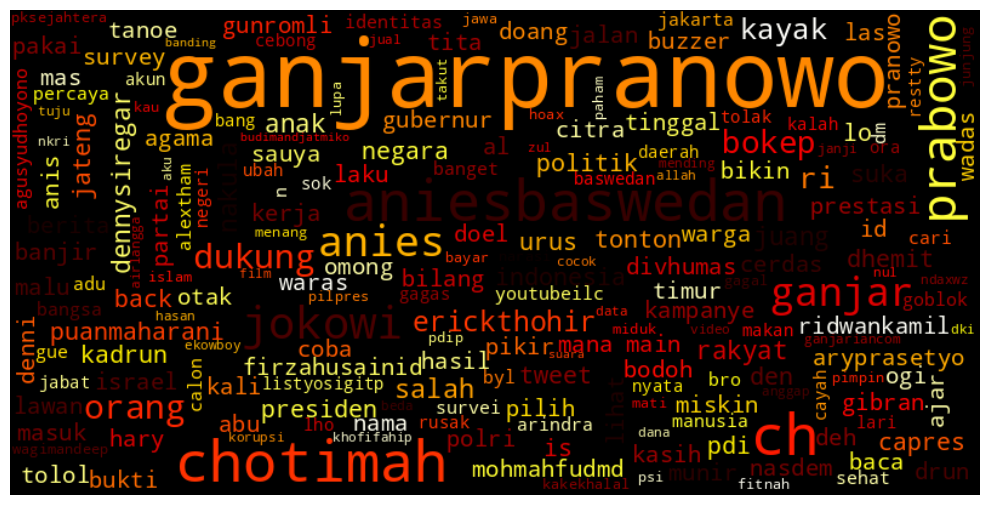

In [194]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize ulang kolom "NoStopwordsTweets" agar kalimat dikonversi menjadi kata-kata.
re_tokenize = [nltk.word_tokenize(tweet) for tweet in negatif]

# Flatten: Konversi list kata-kata ke dalam satu list
list_kata = nltk.FreqDist([kata for tweet in re_tokenize for kata in tweet])

# Wordcloud
wordcloud = WordCloud(width=800, height=400, colormap='hot').generate_from_frequencies(list_kata)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [195]:
top_10_negatif = list_kata.most_common(10)

data_negatif = {
    'Kata Negatif': [kata for kata, total in top_10_negatif],
    'Total': [total for kata, total in top_10_negatif]
}

tabel_negatif = pd.DataFrame(data_negatif)
tabel_negatif

,Kata Negatif,Total
0,ganjarpranowo,1426
1,chotimah,320
2,ch,319
3,aniesbaswedan,318
4,prabowo,232
5,jokowi,186
6,anies,164
7,ganjar,142
8,dukung,98
9,orang,96


Lakukan pengecekan pada data neutral.

In [196]:
neutral = data.loc[data['prediksi']=='neutral', 'tweet']
neutral

11      gibran tweet calon lurah muda mas kaesangp sal...
32      halo sahabatjalancantik kerja pelihara rutin j...
34             monggo ganjarpranowo dolan dukcapil jepara
74      ivanssnto jokowi kemenpu erickthohir ganjarpra...
87      tita psi id ganjarpranowo alohuma wakasumtum w...
                              ...                        
6187    lsi denny nuntuk tiga kali prabowo subianto un...
6192    ganjarpranowo laporgub pakai study tour niku n...
6200    pasang ganjarpranowo erickthohir pilpres bikin...
6204    posisi prabowo susul nama ganjar pranowo elekt...
6210    studi komparasi bus bbg ramah lingkung efisien...
Name: tweet, Length: 506, dtype: object

In [197]:
for net in neutral[:10]:
    print(net)

gibran tweet calon lurah muda mas kaesangp salah dua jadi role model ganjarpranowo
halo sahabatjalancantik kerja pelihara rutin jalan jembatan balai kelola jalan wilayah pati jatenglawancorona bersamalawancorona ganjarpranowo tajyasinmz provjateng dprdjatengprov humasjateng dpubmckjateng
monggo ganjarpranowo dolan dukcapil jepara
ivanssnto jokowi kemenpu erickthohir ganjarpranowo jonggingin
tita psi id ganjarpranowo alohuma wakasumtum wabika amantum
aldrich limmariati ganjarpranowo fersi
hai sahabat jalancantik npekerjaan ctb jalan ambles nbalai kelola jalan wilayah surakarta nruas purwantoro nawangan jatenggayeng ayokerjamaneh ganjarpranowo tajyasinmz provjateng dprdjatengprov dpubmckjateng humasjateng
sitinaf ganjarpranowo laporgub pdkjateng alhamdulillah anak baca lancar tulis rapi tes masuk kelas unggul
dpusdatarujtg provjateng ganjarpranowo tajyasinmz bpkadjtg gass kerja kerja kerja
hparinto tembungkuning ganjarpranowo laporgub lapor mensos risma kunjung lombok cegat mahasiswa lap

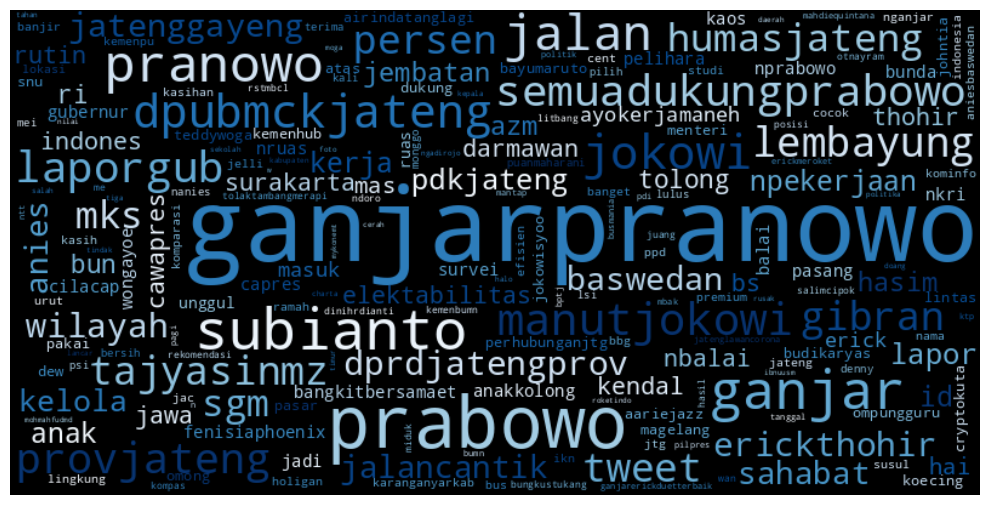

In [198]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize ulang kolom "NoStopwordsTweets" agar kalimat dikonversi menjadi kata-kata.
re_tokenize = [nltk.word_tokenize(tweet) for tweet in neutral]

# Flatten: Konversi list kata-kata ke dalam satu list
list_kata = nltk.FreqDist([kata for tweet in re_tokenize for kata in tweet])

# Wordcloud
wordcloud = WordCloud(width=800, height=400, colormap='Blues_r').generate_from_frequencies(list_kata)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [199]:
top_10_neutral = list_kata.most_common(10)

data_neutral = {
    'Kata Neutral': [kata for kata, total in top_10_neutral],
    'Total': [total for kata, total in top_10_neutral]
}

tabel_neutral = pd.DataFrame(data_neutral)
tabel_neutral

,Kata Neutral,Total
0,ganjarpranowo,436
1,prabowo,177
2,subianto,105
3,ganjar,94
4,pranowo,84
5,jalan,78
6,jokowi,70
7,dpubmckjateng,68
8,manutjokowi,64
9,laporgub,60


Lanjutkan dengan melihat banyaknya sentiment positif, negatif, dan netral dari hasil prediksi.

In [200]:
data.groupby(by='prediksi').agg('count')

,tweet,label
prediksi,,
negatif,1418,1418
neutral,506,506
positif,4302,4302


In [201]:
data.groupby(by='prediksi')['tweet'].agg('count')

prediksi
negatif    1418
neutral     506
positif    4302
Name: tweet, dtype: int64

Tampilkan dalam bentuk grafik untuk memudahkan dalam melihat klasifikasi sentimen.

In [202]:
list_prediksi = data.groupby(by='prediksi').agg('count').values.tolist()
print(list_prediksi)

[[1418, 1418], [506, 506], [4302, 4302]]


In [203]:
n_negatif = list_prediksi[0][0]
n_neutral = list_prediksi[1][0]
n_positif = list_prediksi[2][0]

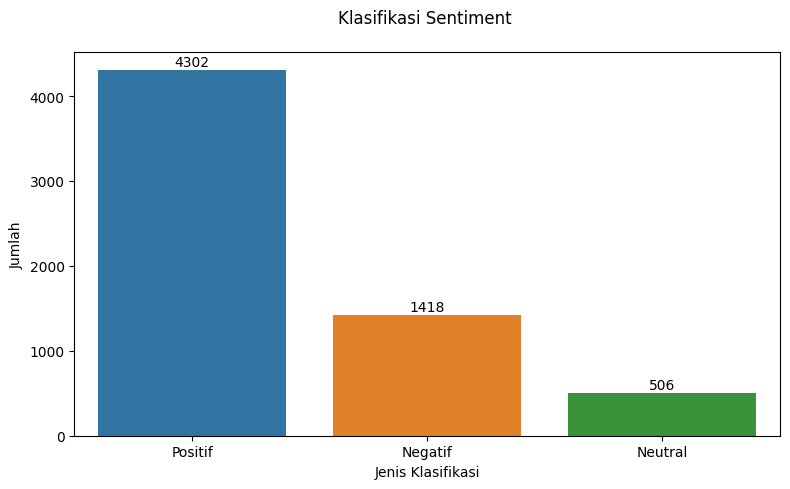

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True

x = ['Positif', 'Negatif', 'Neutral']
y = [n_positif, n_negatif, n_neutral]
percentage = [n_positif, n_negatif, n_neutral]

ax = sns.barplot(x=x, y=y)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+50
    ax.annotate('{:}'.format(percentage[i]), (x, y), ha='center')

plt.title('Klasifikasi Sentiment \n')
plt.xlabel('Jenis Klasifikasi')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan grafik, didapatkan data sebagai berikut.

1. Sentiment positif merupakan sentiment terbanyak dengan total 5420 sentiment.
2. Sentiment negatif merupakan sentiment dengan total 4877 sentiment.
3. Sentiment neutral merupakan sentiment tersedikit dengan total 1110 sentiment.


## Evaluasi

Cek confussion matrix, classification report, dan cross val score.

In [205]:
data2 = data.copy()
data2.head(5)

,tweet,label,prediksi
0,dada gada loyalisgaruda aniesbaswedan ganjarpr...,0,negatif
1,terima kasih ganjarpranowo haedarns abe mukti ...,1,positif
2,ganjarpranowo kunci hidup bahagia damai pilih ...,1,positif
3,ganjar pranowo usaha kayak raya beliau gila ha...,1,positif
4,holigan id ganjarpranowo tempah orang tua ganj...,1,positif


Tentukan variabel X dan y terlebih dahulu agar dapat digunakan pada pemodelan.

In [206]:
# Menentukan x berdasarkan label
data_tweet = pd.DataFrame(data2,columns=['tweet'])
X = data_tweet['tweet']
X

0       dada gada loyalisgaruda aniesbaswedan ganjarpr...
1       terima kasih ganjarpranowo haedarns abe mukti ...
2       ganjarpranowo kunci hidup bahagia damai pilih ...
3       ganjar pranowo usaha kayak raya beliau gila ha...
4       holigan id ganjarpranowo tempah orang tua ganj...
                              ...                        
6221    wongayoe fenisiaphoenix dukung total ganjar pr...
6222    ganjarpranowo ndari jateng bangun indonesia nu...
6223    ejanghadian apokrifa suryadigatot ganjarpranow...
6224    alisyarief adek armando dukung ganjar ganjar p...
6225                    rismawidiono ganjarpranowo lanjut
Name: tweet, Length: 6226, dtype: object

In [207]:
# Menentukan y berdasarkan label
data_label = pd.DataFrame(data2,columns=['label'])
y = data_label['label']
y

0       0
1       1
2       1
3       1
4       1
       ..
6221    1
6222    1
6223    0
6224    1
6225    1
Name: label, Length: 6226, dtype: int64

Lakukan pembagian antara data train dan data test dengan rasio 8:2 atau data train sebesar 80% dan data test sebesar 20%.

In [208]:
from sklearn.model_selection import train_test_split

# Split dataset untuk train dan test
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lakukan vektorisasi untuk TF-IDF.

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF train-test
vect = TfidfVectorizer(analyzer="word", min_df=0.0004, max_df=0.115, ngram_range=(1,3))
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

Lakukan perhitungan skor akurasi berdasarkan MultinomialNB.

In [210]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Melakukan perhitungan skor akurasi berdasarkan MultinomialNB
svmmodel = SVC(gamma=0.1)
svmmodel = svmmodel.fit(X_train_dtm,Y_train)
Y_pred = svmmodel.predict(X_test_dtm)
print(f"Akurasi: {accuracy_score(Y_test,Y_pred)*100:.2f}")

Akurasi: 82.10


Tentukan hasil dari confusion matrix

In [211]:
from sklearn.metrics import confusion_matrix

# Menentukan confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f"Confusion Matrix:\n\n{cm}")

Confusion Matrix:

[[157 143   1]
 [  5 837   1]
 [  4  69  29]]


In [212]:
sentimen = ['Negatif', 'Positif', 'Neutral']
df_cm = pd.DataFrame(cm, index=sentimen, columns=sentimen)
df_cm

,Negatif,Positif,Neutral
Negatif,157,143,1
Positif,5,837,1
Neutral,4,69,29


Tentukan hasil laporan klasifikasi.

In [213]:
from sklearn.metrics import classification_report

# Menentukan laporan hasil klasifikasi
report = classification_report(Y_test, Y_pred)
print(f"Hasil Laporan Klasifikasi:\n\n{report}")

Hasil Laporan Klasifikasi:

              precision    recall  f1-score   support

           0       0.95      0.52      0.67       301
           1       0.80      0.99      0.88       843
           2       0.94      0.28      0.44       102

    accuracy                           0.82      1246
   macro avg       0.89      0.60      0.66      1246
weighted avg       0.84      0.82      0.80      1246



Tentukan nilai cross_val_score.

In [214]:
from sklearn.model_selection import cross_val_score

# Menentukan nilai cross_val_score
cvs = cross_val_score(estimator=nbmodel, X=X_train_dtm, y=Y_train, cv=10)

# Loop kemudian cetak hasil
print("Cross Val Score:")
for n, score in enumerate(cvs, start=1):
    print(f"Folds ke-{n}: {score*100:.2f}")

Cross Val Score:
Folds ke-1: 85.94
Folds ke-2: 88.96
Folds ke-3: 88.55
Folds ke-4: 85.94
Folds ke-5: 84.14
Folds ke-6: 87.55
Folds ke-7: 86.14
Folds ke-8: 86.95
Folds ke-9: 85.34
Folds ke-10: 86.95


In [215]:
cvs_list = cvs.tolist()

# +1 pada nilai n_max dan n_min karena index dimulai dari 0
max_cvs = max(cvs_list)
n_max = (cvs_list.index(max_cvs)) + 1

min_cvs = min(cvs_list)
n_min = (cvs_list.index(min_cvs)) + 1

print(f"Cross val score terbesar terletak pada fold ke-{n_max} dengan nilai {max_cvs*100:.2f}")
print(f"Cross val score terkecil terletak pada fold ke-{n_min} dengan nilai {min_cvs*100:.2f}")

Cross val score terbesar terletak pada fold ke-2 dengan nilai 88.96
Cross val score terkecil terletak pada fold ke-5 dengan nilai 84.14


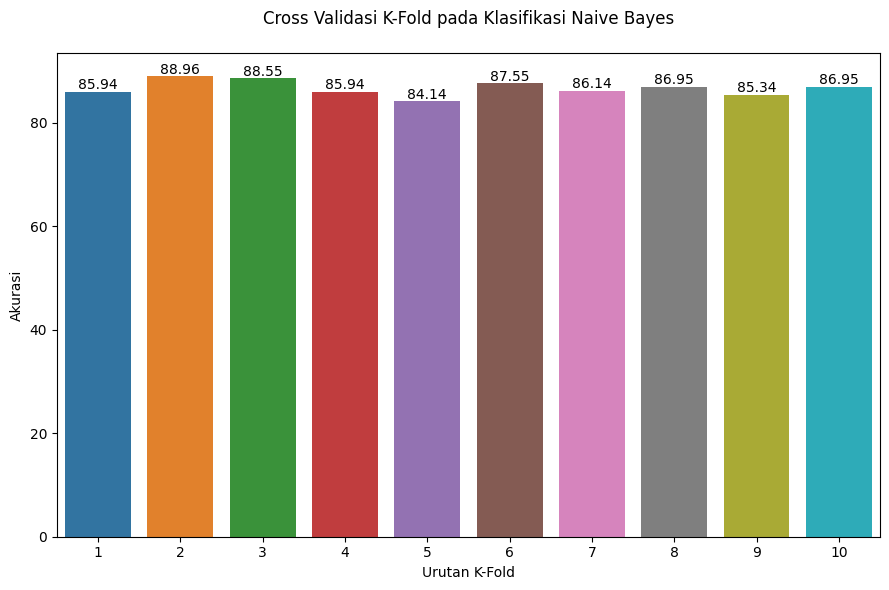

In [216]:
plt.rcParams["figure.figsize"] = [9,6]
plt.rcParams["figure.autolayout"] = True

# Tentukan x dan y pada plot
x = [1,2,3,4,5,6,7,8,9,10]
y = cvs*100

percentage = cvs*100
ax = sns.barplot(x=x, y=y)
patches = ax.patches

# Tambah keterangan di atas barplot
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.5
    ax.annotate('{:.2f}'.format(percentage[i]), (x, y), ha='center')

# Plot barplot
plt.title('Cross Validasi K-Fold pada Klasifikasi Naive Bayes\n')
plt.xlabel('Urutan K-Fold')
plt.ylabel('Akurasi')
plt.show()